# First example

## Introduction

This is based on the PynPoint "first_example.ipynb" found under tutorials

## Getting started

We start by importing the required Python modules for this tutorial.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:101% !important; }</style>"))
import numpy as np

In [2]:
import os
import urllib
import matplotlib.pyplot as plt

And also the pipeline and pipeline modules of PynPoint.

In [3]:
from pynpoint import Pypeline, Hdf5ReadingModule, PSFpreparationModule, PcaPsfSubtractionModule, ExampleModule

In [4]:
#hack
import h5py as h5
incomingFN = "muf_os9_ccd_images_with_planets.hdf5" # unprocessed
incomingFN = "muf_os9_ccd_images_with_planets2.hdf5" # unprocessed data that was photon-reduced and normalized
# incomingFN = "processed_os9_targandref.hdf5" # works for ADI and RDI, depending on the PARANG supplied

f=h5.File("./"+incomingFN,"r") # f = file-object
print("f.keys()         : ", f.keys())
print("f.values()       : ", f.values())
datasetnames = [dsn for dsn in f.keys()]
for dsn in datasetnames:
    print("dsn              :", dsn)
header_stack_var = f["header_stack"]
stack_var        = f["stack"]
stackr_var       = f["stackr"] # ref
summaryT_var     = f["summaryT"]


f.keys()         :  <KeysViewHDF5 ['header_stack', 'stack', 'stackr', 'summaryT']>
f.values()       :  ValuesViewHDF5(<HDF5 file "muf_os9_ccd_images_with_planets2.hdf5" (mode r)>)
dsn              : header_stack
dsn              : stack
dsn              : stackr
dsn              : summaryT


In [5]:
# Get the group that lives under header-stack
g = f.require_group("header_stack") # g = group-object
print("g.keys()   : ", g.keys())

g.keys()   :  <KeysViewHDF5 ['PARANG']>


In [6]:
# Get the array that has the position angles
parang_var = g["PARANG"]
print("len(parang_var) : ", len(parang_var))
for pa in parang_var:
    print(pa, end="")

len(parang_var) :  12
000000-22-22-22-22-22-22

In [7]:
# Get the summaryT Summary Table
for rec in summaryT_var:
    strtii=rec[0]
    end_ii=rec[1]
    numfrm=rec[2]
    star  =rec[3]
    visit =rec[4]
    exptim=rec[5]
    print("{:6}".format(strtii),"{:6}".format(end_ii),"{:6}".format(numfrm),"{:6}".format(star),"{:6}".format(visit),"{:6}".format(exptim))
    if visit%6==0:print()    

     0     59     60      0      1     60
    60   1079   1020    -11      2      5
  1080   2339   1260     11      3      5
  2340   3599   1260    -11      4      5
  3600   4859   1260     11      5      5
  4860   4924     65      0      6     60

  4925   4984     60      0      7     60
  4985   6004   1020     11      8      5
  6005   7264   1260    -11      9      5
  7265   8524   1260     11     10      5
  8525   9784   1260    -11     11      5
  9785   9849     65      0     12     60

  9850   9909     60      0     13     60
  9910  10929   1020    -11     14      5
 10930  12189   1260     11     15      5
 12190  13449   1260    -11     16      5
 13450  14709   1260     11     17      5
 14710  14734     25      0     18     60



In [8]:
# This was tracking _changes_ from one roll angle back to the other.
print("len ( parang_var ) : ", len ( parang_var ))
for ii in range ( len ( parang_var ) ):
#     print("ii", ii, parang_var[ii]) # Keep display-all
    if ii > 0 and parang_var[ii] * parang_var[ii-1] < 0:
        print("ii-1", "{:5d}".format(ii-1), "{:5d}".format(parang_var[ii-1] ))
        print("ii  ", "{:5d}".format(ii  ), "{:5d}".format(parang_var[ii]   ))
        print()

len ( parang_var ) :  12


In [9]:
print("header_stack_var : ", header_stack_var)
for each in header_stack_var:
    print("each             : ", each)

header_stack_var :  <HDF5 group "/header_stack" (1 members)>
each             :  PARANG


In [10]:
print("stack_var           : ", stack_var)
print("stack_var.shape     : ", stack_var.shape)
print("stackr_var          : ", stackr_var)
print("stackr_var.shape    : ", stackr_var.shape)
print("summaryT_var        : ", summaryT_var)
print("summaryT_var.shape  : ", summaryT_var.shape)
# Make sure this matches the shape discovered above for the OS9 data: "HDUL[0].shape :  (14735, 67, 67)"
print()


"""Sanity check of first values from EVERY frame """
for fk in range ( len ( stack_var ) ) :
    print(fk,stack_var[fk][0][0])

stack_var           :  <HDF5 dataset "stack": shape (12, 67, 67), type "<f4">
stack_var.shape     :  (12, 67, 67)
stackr_var          :  <HDF5 dataset "stackr": shape (6, 67, 67), type "<f4">
stackr_var.shape    :  (6, 67, 67)
summaryT_var        :  <HDF5 dataset "summaryT": shape (18, 6), type "<i8">
summaryT_var.shape  :  (18, 6)

0 1.3844775e-09
1 2.3085352e-10
2 4.2563678e-10
3 5.242306e-10
4 4.4059676e-09
5 -1.8516401e-10
6 2.2051345e-09
7 -4.2082715e-10
8 2.5015674e-09
9 8.7532087e-10
10 1.2721006e-09
11 -8.584876e-10


In [11]:
# assert False

## Initiating the Pypeline

We will now initiate PynPoint by creating an instance of the [Pypeline](https://pynpoint.readthedocs.io/en/latest/pynpoint.core.html?highlight=Pypeline#pynpoint.core.pypeline.Pypeline) class. The object requires the paths of the working folder, input folder and output folder. Here we simply use the current folder for all three of them.

In [12]:
pipeline = Pypeline(working_place_in='./',
                    input_place_in='./',
                    output_place_in='./')

PynPoint v0.9.0

A new version (0.10.0) is available!

Want to stay informed about updates, bug fixes, and new features?
Please consider using the 'Watch' button on the Github page:
https://github.com/PynPoint/PynPoint

Database: ./PynPoint_database.hdf5
Configuration: ./PynPoint_config.ini

Number of CPUs: 16
Number of threads: not set


A configuration file with default values has been created in the working folder. Next, we will add three pipeline modules to the `Pypeline` object.

## PSF subtraction with PCA

We start with the [Hdf5ReadingModule](https://pynpoint.readthedocs.io/en/latest/pynpoint.readwrite.html#pynpoint.readwrite.hdf5reading.Hdf5ReadingModule) which will import the preprocessed data from the HDF5 file that was downloaded into the current database. The instance of the `Hdf5ReadingModule` class is added to the `Pypeline` with the [add_module](https://pynpoint.readthedocs.io/en/latest/pynpoint.core.html?highlight=add_module#pynpoint.core.pypeline.Pypeline.add_module) method. The dataset that we need to import has the tag *stack* so we specify this name as input and output in the dictionary of `tag_dictionary`.

In [13]:
module = Hdf5ReadingModule(name_in='read',
                           input_filename=incomingFN,
                           input_dir=None,
                           tag_dictionary={'stack': 'stack', 
                                           'stackr': 'stackr', 
                                           'summaryT': 'summaryT'}
                          )
pipeline.add_module(module)

In [14]:
module = PSFpreparationModule(
    name_in='prep_name',
    image_in_tag='stack',
    image_out_tag='prep',
    mask_out_tag=None,
    norm=False,
    resize=None,
    # cent_size=0.15, # Beta Pic only "Radius of the central mask (in arcsec)."
    # edge_size=1.1   # Beta Pic only
    cent_size=2, # OS9 only
    edge_size=16 # OS9 only
    # cent_size=None, # OS9 only
    # edge_size=None # OS9 only
)
pipeline.add_module(module)

name_in       :  prep_name
image_in_tag  :  stack
image_out_tag :  prep


In [15]:
mode = 1
if mode == 0 : # ADI
    module = PcaPsfSubtractionModule(pca_numbers=[1, ],
        name_in='pca',
        images_in_tag='prep',
        reference_in_tag='prep',
        res_median_tag='residuals'
        )
if mode == 1 : # RDI
    module = PcaPsfSubtractionModule(pca_numbers=[1, ],
        name_in='pca',
        images_in_tag='prep',
        reference_in_tag='stackr',                            
        res_median_tag='residuals',
        subtract_mean=False
        )

pipeline.add_module(module)

We can now run the three pipeline modules that were added toe the `Pypeline` with the [run](https://pynpoint.readthedocs.io/en/latest/pynpoint.core.html?highlight=Pypeline#pynpoint.core.pypeline.Pypeline.run) method.

In [16]:
pipeline.run()


-----------------
Hdf5ReadingModule
-----------------

Module name: read
Reading HDF5 file... [DONE]                      
Output ports: stack (12, 67, 67), stackr (6, 67, 67), summaryT (18, 6)

--------------------
PSFpreparationModule
--------------------

Module name: prep_name
Input port: stack (12, 67, 67)
Deleting data and attributes: prep
Preparing images for PSF subtraction... [DONE]                      
Output port: prep (12, 67, 67)

-----------------------
PcaPsfSubtractionModule
-----------------------

Module name: pca
Input ports: stackr (6, 67, 67), prep (12, 67, 67)
Deleting data and attributes: residuals
Input parameters:
   - Post-processing type: ADI
   - Number of principal components: [1]
   - Subtract mean: False
   - Extra rotation (deg): 0.0
Constructing PSF model... [DONE]
Creating residuals

TESTDIAG len(parang) :  12
TESTDIAG parang :  [ 0.  0.  0.  0.  0.  0. 22. 22. 22. 22. 22. 22.] 


. [DONE]
Output port: residuals (1, 67, 67)


## Accessing results in the database

The `Pypeline` has [several methods](https://pynpoint.readthedocs.io/en/latest/pynpoint.core.html?highlight=Pypeline#pynpoint.core.pypeline.Pypeline) to access the datasets and attributes that are stored in the database. For example, we can use the [get_shape](https://pynpoint.readthedocs.io/en/latest/pynpoint.core.html?highlight=Pypeline#pynpoint.core.dataio.InputPort.get_shape) method to check the shape of the *residuals* dataset that was stored by the `PcaPsfSubtractionModule`. The dataset contains 1 image since we ran the PSF subtraction only with 20 principal components.

In [17]:
pipeline.get_shape('residuals')

(1, 67, 67)

Next, we use the [get_data](https://pynpoint.readthedocs.io/en/latest/pynpoint.core.html?highlight=Pypeline#pynpoint.core.pypeline.Pypeline.get_data) method to read the median-collapsed residuals of the PSF subtraction.

In [18]:
residuals = pipeline.get_data('residuals')

We will also extract the pixel scale, which is stored as the `PIXSCALE` attribute of the dataset, by using the [get_attribute](https://pynpoint.readthedocs.io/en/latest/pynpoint.core.html?highlight=Pypeline#pynpoint.core.pypeline.Pypeline.get_attribute) method.

In [19]:
pixscale = pipeline.get_attribute('residuals', 'PIXSCALE')
print(f'Pixel scale = {pixscale*1e3} mas')

Pixel scale = 420.0 mas


## Plotting the residuals

Finally, let's have a look at the residuals of the PSF subtraction. For simplicity, we define the image size in arcseconds.

In [20]:
size = pixscale * residuals.shape[-1]/2.
print(size)

14.07


And plot the first image of the *residuals* dataset with `matplotlib`.

In [21]:
print(residuals[0, ].shape)

(67, 67)


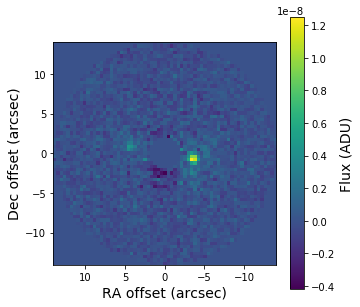

In [22]:
plt.figure (figsize=[5,5])
plt.imshow(residuals[0, ], origin='lower', extent=[size, -size, -size, size])
plt.xlabel('RA offset (arcsec)', fontsize=14)
plt.ylabel('Dec offset (arcsec)', fontsize=14)
cb = plt.colorbar()
cb.set_label('Flux (ADU)', size=14.)